#BOSTON HOUSING : Linear Regression

###1.   Dataset description :

*   crim : per capita crime rate by town
*   zn : proportion of residential land zoned for lots over 25,000 sq.ft.
*   indus : proportion of non-retail business acres per town.
*   chas : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
*   nox : nitrogen oxides concentration (parts per 10 million).
*   rm : average number of rooms per dwelling.
*   age : proportion of owner-occupied units built prior to 1940.
*   dis : weighted mean of distances to five Boston employment centres.
*   rad : index of accessibility to radial highways.
*   tax : full-value property-tax rate per \$10,000.
*   ptratio : pupil-teacher ratio by town.
*   black : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
*   lstat : lower status of the population (percent).
*   mdev : median value of owner-occupied homes in \$1000s. (target variable)

ref : [https://www.kaggle.com/c/boston-housing]

In [0]:
#import required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import datetime
import math

In [0]:
#loading Boston Housing dataset
boston = load_boston()
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] =  boston.target

In [3]:
#Observe the data
boston_dataset.shape
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###2. Feature Selection

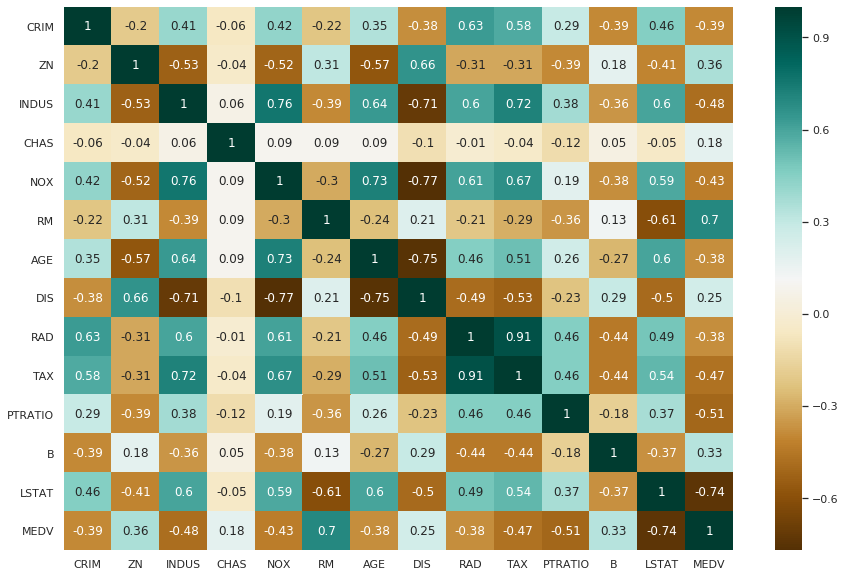

In [4]:
#correlation matrix for feature selection
corr_matrix = boston_dataset.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap="BrBG")
plt.show()

In [5]:
#Relevant features are features highly correlated with our target variable
relevant_features = abs(corr_matrix["MEDV"])
relevant_features = relevant_features[relevant_features > 0.5]
relevant_features

RM         0.70
PTRATIO    0.51
LSTAT      0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [6]:
#Because of Least Squares Assumptions (LSA), the independant variables (features) must be uncorrelated with each other
boston_dataset[["RM", "PTRATIO", "LSTAT"]].corr().round(2)

,RM,PTRATIO,LSTAT
RM,1.00,-0.36,-0.61
PTRATIO,-0.36,1.00,0.37
LSTAT,-0.61,0.37,1.00


In [0]:
X = boston_dataset[['PTRATIO', 'LSTAT']]
y = boston_dataset.MEDV

###3. Data Preprocessing

In [0]:
#preprocessing the data to obtain it in required format
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    
    # set seed to have reproducible/consistent results
    np.random.seed(seed)
    
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    
    # create split
    x_tr = x.iloc[index_tr]
    x_te = x.iloc[index_te]
    y_tr = y.iloc[index_tr]
    y_te = y.iloc[index_te]
    return x_tr, x_te, y_tr, y_te

def standardize(x):
    """Normalizes the original data set."""
    return (x - x.mean(axis=0))/ x.std(axis=0)

def build_model_data(x):
    """Form tX to get regression data in matrix form. tX is X with intercept"""
    num_samples = y.shape[0]
    x["INTERCEPT"] = pd.Series(np.ones(num_samples))
    return x

def prepare_model(X, y, ratio, s) :
    """Apply all previous helper functions to preprocess data"""
    
    X_train, X_test, y_train, y_test = split_data(X, y, ratio, seed=s)
    
    X_train = standardize(X_train)
    X_train = build_model_data(X_train)
    
    X_test = standardize(X_test)
    X_test = build_model_data(X_test)
    
    return X_train, X_test, y_train, y_test

In [0]:
X_train, X_test, y_train, y_test = prepare_model(X, y, 0.9, 1)

###4. Numpy/Pandas Implementation

In [0]:
#compute the mean squared erre
def compute_cost(X, theta, Y):
  """Compute the cost function"""
  num_rows = X.shape[0]
  return np.sum((X.dot(theta) - Y)**2) / (2*num_rows)

In [0]:
#Gradient descent function
def gradient_descent(X, theta, Y, iterations, learning_rate):
  """Gradient Descent Algorithm"""
  m = X.shape[0]
  for iter in range(iterations):
    h = X.dot(theta)
    loss = h - Y
    gradient = X.T.dot(loss) / m
    cost = compute_cost(X, theta, Y)
    theta = theta - learning_rate*gradient
    if(iter%5 == 0):
      print("gradient descent : loss = {loss}, wo={w0} w1={w1} w2={w2}".format(loss=cost, w0=theta[0], w1=theta[1], w2=theta[2]))
  return cost, theta

In [12]:
#initialising theta and initial cost funcion value
theta = np.array([0, 0, 0])

initial_cost = compute_cost(X_train, theta, y_train)
print(initial_cost)
y_train.shape

302.93358241758244


(455,)

In [16]:
#run gradient descent algorithm to find the optimised value of theta
max_iteration = 50
learning_rate = 0.7

cost, theta = gradient_descent(X_train, theta, y_train, max_iteration, learning_rate)

gradient descent : loss = 302.93358241758244, wo=-3.272907430094308 w1=-4.805168507903804 w2=15.944923076923075
gradient descent : loss = 17.307183636304103, wo=-2.513131957296604 w1=-5.90539645739995 w2=22.761856040000044
gradient descent : loss = 17.299576586092893, wo=-2.4606969381905097 w1=-5.957831513332362 w2=22.77842118710032
gradient descent : loss = 17.299557264786834, wo=-2.457740563888517 w1=-5.960787887634359 w2=22.778461440407774
gradient descent : loss = 17.29955720339521, wo=-2.457573878606557 w1=-5.960954572916319 w2=22.77846153822331
gradient descent : loss = 17.299557203200052, wo=-2.4575644806141566 w1=-5.96096397090872 w2=22.778461538461002
gradient descent : loss = 17.299557203199427, wo=-2.4575639507397726 w1=-5.960964500783104 w2=22.778461538461578
gradient descent : loss = 17.299557203199427, wo=-2.457563920864576 w1=-5.960964530658299 w2=22.77846153846158
gradient descent : loss = 17.299557203199427, wo=-2.4575639191801635 w1=-5.960964532342713 w2=22.7784615384

In [17]:
print(cost)
print(theta)

17.299557203199427
PTRATIO      -2.457564
LSTAT        -5.960965
INTERCEPT    22.778462
dtype: float64


In [24]:
#test our model on test dataset
pred = X_test.dot(theta)
train_loss = compute_cost(X_train, theta, y_train)
test_loss = compute_cost(X_test, theta, y_test)
print("Train error is {loss}".format(loss=train_loss))
print("Test error is {loss}".format(loss=test_loss))

Train error is 17.299557203199427
Test error is 13.256211258964639


###5. SKLearn Implementation

In [0]:
#compare our linear model with sklearn model
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

train_loss_sk = np.sum((model.predict(X_train) - y_train)**2) / (2*len(y_train))
print("Train loss : {}".format(train_loss_sk))
test_loss_sk = np.sum((model.predict(X_test) - y_test)**2) / (2*len(y_test))
print("Test loss : {}".format(test_loss_sk))

Train loss : 17.299557203199427
Test loss : 13.256211258965232
